# Работа в Pandas

**Pandas** (Python Data Analysis Library) — библиотека языка Python для [удобных] обработки и анализа данных. 
Рассмотрим данную библиотеку на примере [данных](https://www.kaggle.com/c/titanic/data) [соревнования](https://www.kaggle.com/c/titanic) о предсказании судьбы пассажиров лайнера "Титаник". Имеется некоторая информация о пассажирах, по которой необходимо предсказать выживаемость каждого из них.

In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
df.index

RangeIndex(start=0, stop=891, step=1)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Обращение к элементам таблицы

In [11]:
print(df.at[53, 'Age'], '\n')

29.0 



In [14]:
print(df.loc[[1,2,4,15,30,44], ['PassengerId','Name','Pclass', 'Fare']])

    PassengerId                                               Name  Pclass  \
1             2  Cumings, Mrs. John Bradley (Florence Briggs Th...       1   
2             3                             Heikkinen, Miss. Laina       3   
4             5                           Allen, Mr. William Henry       3   
15           16                   Hewlett, Mrs. (Mary D Kingcome)        2   
30           31                           Uruchurtu, Don. Manuel E       1   
44           45                      Devaney, Miss. Margaret Delia       3   

       Fare  
1   71.2833  
2    7.9250  
4    8.0500  
15  16.0000  
30  27.7208  
44   7.8792  


In [18]:
df.iloc[10:30,1:6]

,Survived,Pclass,Name,Sex,Age
10,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0
11,1,1,"Bonnell, Miss. Elizabeth",female,58.0
12,0,3,"Saundercock, Mr. William Henry",male,20.0
13,0,3,"Andersson, Mr. Anders Johan",male,39.0
14,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0
15,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0
16,0,3,"Rice, Master. Eugene",male,2.0
17,1,2,"Williams, Mr. Charles Eugene",male,NaN
18,0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,31.0
19,1,3,"Masselmani, Mrs. Fatima",female,NaN


In [81]:
df[['Name', 'Sex', 'Parch']].head(10) #tail

,Name,Sex,Parch
0,"Braund, Mr. Owen Harris",male,0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0
2,"Heikkinen, Miss. Laina",female,0
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0
4,"Allen, Mr. William Henry",male,0
5,"Moran, Mr. James",male,0
6,"McCarthy, Mr. Timothy J",male,0
7,"Palsson, Master. Gosta Leonard",male,1
8,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,2
9,"Nasser, Mrs. Nicholas (Adele Achem)",female,0


Также действует и логическая индексация, которая позволяет рассматривать определенные группы объектов:

In [82]:
df[df['Sex'] == 'female'].head() # женщины на борту

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [19]:
df[(df['Sex'] == 'female') & (df['Age'] <= 10)].head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
24,25,0,3,"Palsson, Miss. Torborg Danira",female,8.0,3,1,349909,21.0750,NaN,S
43,44,1,2,"Laroche, Miss. Simonne Marie Anne Andree",female,3.0,1,2,SC/Paris 2123,41.5792,NaN,C
58,59,1,2,"West, Miss. Constance Mirium",female,5.0,1,2,C.A. 34651,27.7500,NaN,S
119,120,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.0,4,2,347082,31.2750,NaN,S
147,148,0,3,"Ford, Miss. Robina Maggie ""Ruby""",female,9.0,2,2,W./C. 6608,34.3750,NaN,S
172,173,1,3,"Johnson, Miss. Eleanor Ileen",female,1.0,1,1,347742,11.1333,NaN,S
184,185,1,3,"Kink-Heilmann, Miss. Luise Gretchen",female,4.0,0,2,315153,22.0250,NaN,S
205,206,0,3,"Strom, Miss. Telma Matilda",female,2.0,0,1,347054,10.4625,G6,S
233,234,1,3,"Asplund, Miss. Lillian Gertrud",female,5.0,4,2,347077,31.3875,NaN,S


### Некоторые полезные функции

In [21]:
df['Sex'].nunique() # количество уникальных элементов в столбце

2

In [22]:
df['Sex'].value_counts() # встречаемость каждого уникального элемента

male      577
female    314
Name: Sex, dtype: int64

In [23]:
df['Fare'].sum() #сумма значений в столбце

28693.9493

In [24]:
df['Age'].mean() #среднее значение элементов столбца

29.69911764705882

In [25]:
df['Age'].std() #среднеквадратичное отклонение 

14.526497332334044

In [84]:
df.sort_values(by='Fare',ascending=False).head() # сортировка по столбцу

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_category
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,Middle_aged
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,Middle_aged
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,Middle_aged
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S,Young
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S,Young


Что  делает следующая команда?

In [32]:
df[(df['Survived'] == 1) & 
     (df['Fare'] > 200)].sort_values(by='Fare',
                               ascending=False).head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S


### Пропущенные значения в данных (NaN) 

In [35]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Группировка данных с помощью groupby

Группировка при помощи метода groupby позволяет объединять данные в группы по одному или нескольким признакам и считать по ним общую статистику.

In [36]:
df.groupby('Sex')# группируем по полу

In [37]:
df.groupby('Sex')['Pclass'].value_counts() 

Sex     Pclass
female  3         144
        1          94
        2          76
male    3         347
        1         122
        2         108
Name: Pclass, dtype: int64

In [38]:
df.groupby(['Sex','Pclass'])['Age'].mean()

Sex     Pclass
female  1         34.611765
        2         28.722973
        3         21.750000
male    1         41.281386
        2         30.740707
        3         26.507589
Name: Age, dtype: float64

In [39]:
df.groupby('Sex')['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

### Функция apply 

Создадим новый признак, описывающий принадлежность к возрастной группе:

In [43]:
def age_category(age):
    '''
    < 30 -> 1
    >= 30, <55 -> 2
    >= 55 -> 3
    '''
    if age < 30:
        return "Young"
    elif age < 55:
        return "Middle_aged"
    elif age >= 55:
        return "Old_one"

In [66]:
df['Age_category'] = df['Age'].apply(age_category) 
df.groupby('Age_category')['Survived'].mean()

Age_category
Middle_aged    0.420139
Old_one        0.309524
Young          0.406250
Name: Survived, dtype: float64

### Графики, гистограммы и boxplot

Text(0.5, 1.0, 'Age distribution')

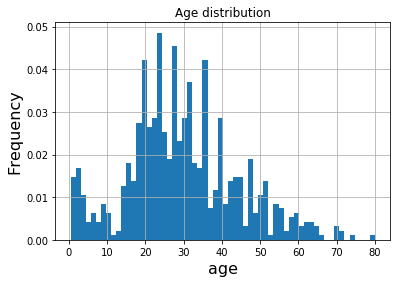

In [75]:
df.hist(['Age'],bins=60,density=True)
plt.xlabel('age',fontsize=16)
plt.ylabel('Frequency',fontsize=16)
plt.title('Age distribution')

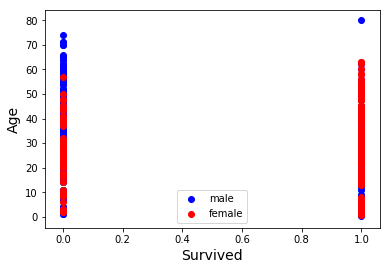

In [79]:
plt.scatter(df[(df['Sex']=='male')]['Fare'],df[(df['Sex']=='male')]['Age']
              ,color='b',label='male')
plt.scatter(df[(df['Sex']=='female')]['Survived'],df[(df['Sex']=='female')]['Age']
              ,color='r',label='female')
plt.legend()
plt.xlabel('Survived',fontsize=14)
plt.ylabel('Age',fontsize=14)
plt.savefig('fig01.png')

In [81]:
age_males=df[(df['Sex'] == 'male')]['Age'].dropna().values
age_females=df[(df['Sex'] == 'female')]['Age'].dropna().values

Text(0, 0.5, 'Age')

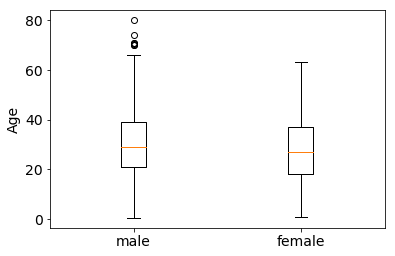

In [82]:
fig=plt.boxplot([age_males,age_females],labels=['male','female'])
plt.tick_params(axis='both', which='major', labelsize=14)
plt.ylabel('Age', fontsize=14)

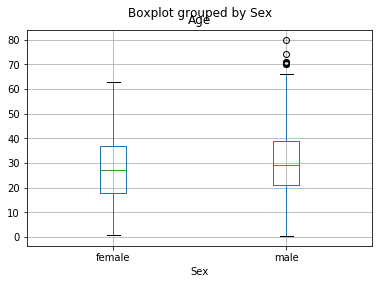

In [83]:
df.boxplot('Age',by='Sex')